## Churn Prediction Model

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [9]:
df = pd.read_csv("/Users/ata.cinetci/Desktop/DataScience/churn_prediction_project/Churn_Modelling.csv")

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [16]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [20]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

## Feature Scaling


In [25]:
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])
df = pd.get_dummies(df, columns = ["Geography"], drop_first=True)

In [27]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [29]:
features = ["CreditScore","Gender","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Geography_Germany","Geography_Spain"]


In [31]:
X = df[features]
y = df["Exited"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection

In [ ]:
## Random Forest:

In [39]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_prediction = model.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test,y_prediction)
accuracy

0.8675

In [45]:
conf_mat = confusion_matrix(y_test,y_prediction)
print(conf_mat)

[[1550   57]
 [ 208  185]]


In [47]:
class_report = classification_report(y_test, y_prediction)
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [74]:
## Logistic Regression:

In [52]:
from sklearn.linear_model import LogisticRegression

In [54]:
logistic_reg = LogisticRegression(random_state = 42)
logistic_reg.fit(X_train,y_train)
y_prediction_log = logistic_reg.predict(X_test)

accuracy = accuracy_score(y_test,y_prediction_log)
class_report = classification_report(y_test, y_prediction_log)
conf_mat = confusion_matrix(y_test,y_prediction_log)

print(conf_mat)
print(accuracy)
print(class_report)


[[1543   64]
 [ 314   79]]
0.811
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [ ]:
## Gradient Boosting:

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm.fit(X_train,y_train)

y_predicted_gbm = gbm.predict(X_test)

In [95]:
accuracy = accuracy_score(y_test,y_predicted_gbm)
class_report = classification_report(y_test, y_predicted_gbm)
conf_mat = confusion_matrix(y_test,y_predicted_gbm)

print(conf_mat)

[[1543   64]
 [ 201  192]]


In [97]:
print(accuracy)


0.8675


In [99]:
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [59]:
importance = model.feature_importances_
indices = np.argsort(importance)[::-1]
names = [features[i] for i in indices]

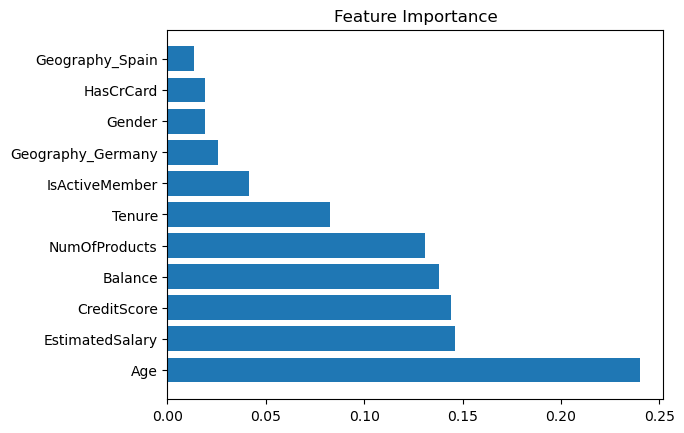

In [61]:
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importance[indices])
plt.yticks(range(X.shape[1]), names)
plt.show()